# Face Recognition

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install face_recognition

     |████████████████████████████████| 100.1 MB 9.9 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=67f90ef666d327f838e8a5b66f12377f9d9bc0ace004949831cf93fd1899cf92
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [5]:
pwd

'/content'

In [6]:
cd /content/drive/MyDrive/Colab Notebooks/FaceRecognition

/content/drive/MyDrive/Colab Notebooks/FaceRecognition


In [55]:
pwd

'/content/drive/My Drive/Colab Notebooks/FaceRecognition'

In [56]:
ls

3.jpg  FaceRecognition.ipynb  known/  unknown/


In [57]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

def read_img(path):
    img = cv2.imread(path)
    (h, w) = img.shape[:2]
    width = 200
    ratio = width/float(w)
    height = int(h*ratio)
    return cv2.resize(img, (height, width))


In [58]:
known_encodings = []
known_names = []
known_dir = 'known'

for file in os.listdir(known_dir):
    img = read_img(known_dir + '/' + file)
    img_enc = face_recognition.face_encodings(img)[0]
    known_encodings.append(img_enc)
    known_names.append(file.split('.')[0])


In [59]:
known_encodings

[array([-0.03431362,  0.11701896,  0.10392875,  0.00667498, -0.14626555,
         0.0264408 , -0.02843636, -0.1888306 ,  0.16152452, -0.0606515 ,
         0.2556186 , -0.09335992, -0.23279807, -0.00796835,  0.01204874,
         0.0917291 , -0.14698738, -0.09451514, -0.00407587, -0.12697652,
         0.13194367,  0.05669197,  0.01953875, -0.03815698, -0.14368254,
        -0.29658467, -0.10657589, -0.08838628,  0.13717254, -0.06545723,
         0.04509191,  0.03825164, -0.1531163 , -0.05598959,  0.02238736,
         0.02821652, -0.0904097 , -0.07919283,  0.1982688 , -0.08759366,
        -0.20643464,  0.00247464,  0.06131728,  0.17216483,  0.13381624,
         0.04055615,  0.02586035, -0.09165485,  0.05892985, -0.20279962,
         0.08291177,  0.18663698,  0.06923099,  0.03151742,  0.1283707 ,
        -0.13064173, -0.05183718,  0.19813612, -0.14772393,  0.09056087,
         0.1424087 , -0.09002692, -0.00923053, -0.05890069,  0.14995098,
         0.06048576, -0.04777595, -0.15109366,  0.1


Processing 2.jpg


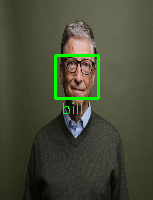


Processing 1.jpg


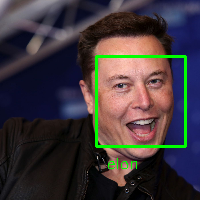


Processing 5.jpg


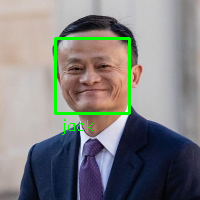


Processing 6.jpg


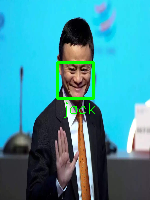


Processing 4.jpg


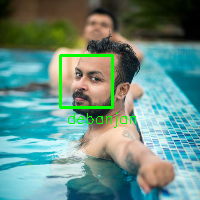

In [60]:
unknown_dir = 'unknown'
results_list = []

for file in os.listdir(unknown_dir):
    img_enc = []
    file_path = unknown_dir + '/' + file
    print("\nProcessing", file)
    img = read_img(file_path)
    img_enc = face_recognition.face_encodings(img)[0]
    
    results = face_recognition.compare_faces(known_encodings, img_enc)
    results_list.append(results)

    for j in range(len(results)):
        if results[j]:
            name = known_names[j]

            (top, right, bottom, left) = face_recognition.face_locations(img)[0]
            cv2.rectangle(img, (left, top), (right, bottom), (0,255,0), 2)

            font                   = cv2.FONT_HERSHEY_SIMPLEX
            bottomLeftCornerOfText = (round(left*1.1),round(bottom*1.15))
            fontScale              = 0.5
            fontColor              = (0,255,0)
            lineThickness          = 1

            image = cv2.putText(img, name, bottomLeftCornerOfText, font, fontScale, fontColor, lineThickness)
            cv2_imshow(image)